# Rental Bike Demand Prediction
## Problem Statement
- A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Covid-19 pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

- In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Reading Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing pandas for reading data
import pandas as pd
import numpy as np

In [3]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#checking null values in columns
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Dropping Columns**
- instant : it is just an numerical column unique for each record, not much useful for us.
- dteday : it is date column, but we already have month and year collumn seperately, and as we will not be performing day to day analysis, it is not reduired.
- As cnt (target variable) column is sum of registered and casual column, hence these are also not reguired

In [8]:
bike.drop(['instant','dteday','registered','casual'],axis=1,inplace=True)

### Step 2: Visualizing Data

In [9]:
# Importing visualizaion libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [11]:
# Dividing columns into numerical and categorical columns'
num_col = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_col = ['season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']

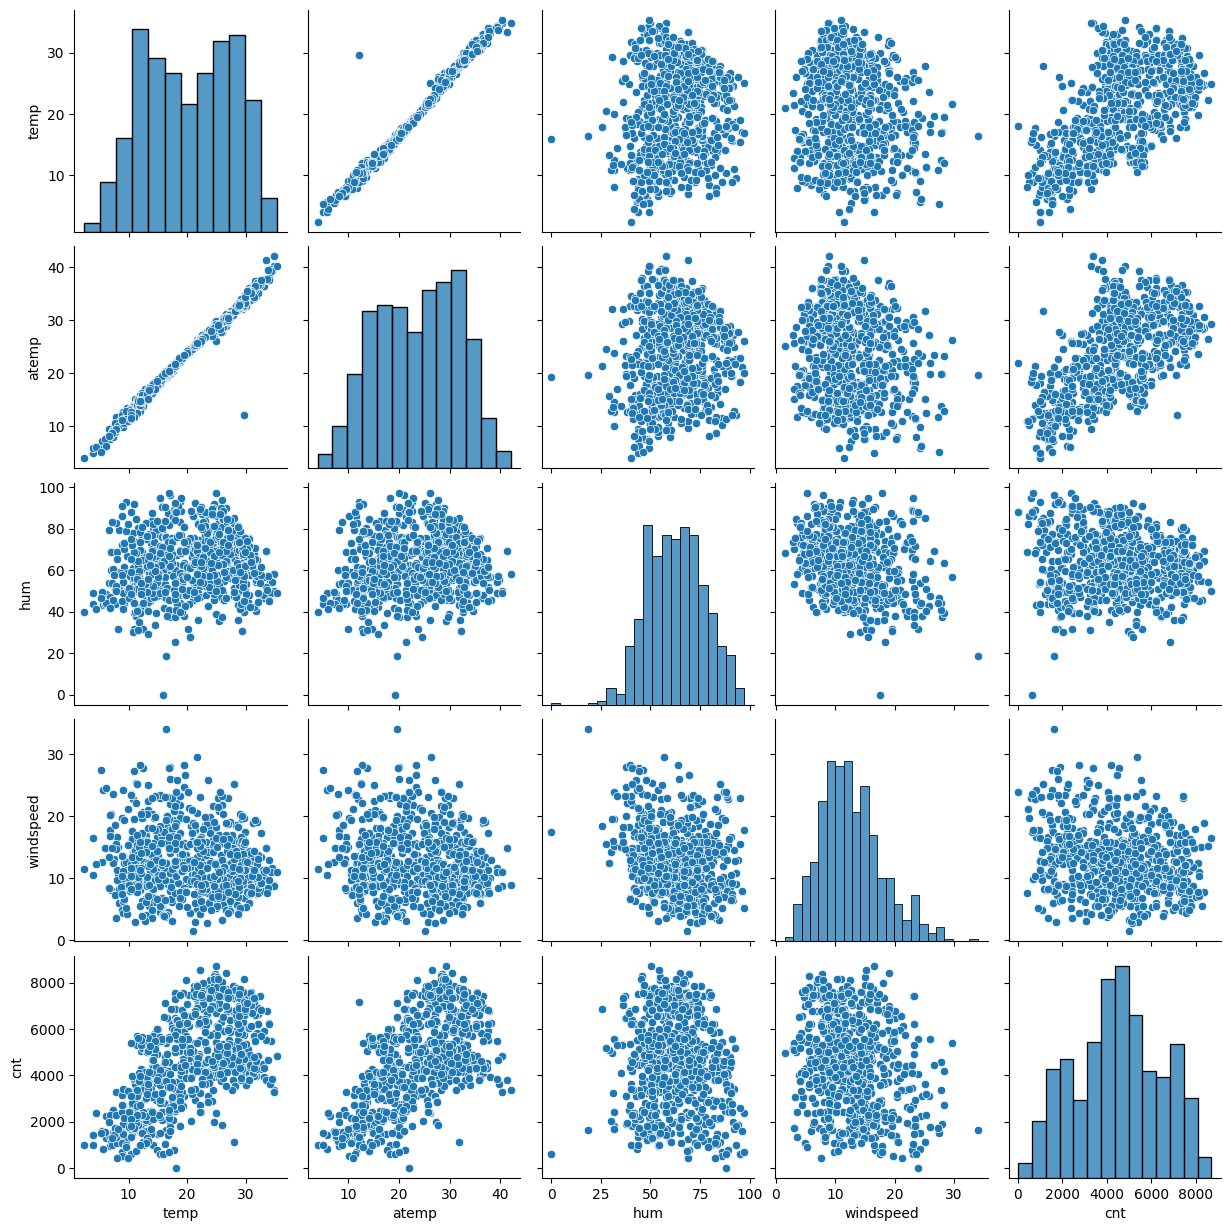

In [12]:
#Plotting Numeircal columns
sns.pairplot(data=bike, vars=num_col)
plt.show()

**Observation**
- temp and atemp columns are highly correlated
- cnt is increasing with increase in temp and atemp columns
- most of hum distribution lies for high value of hum columns
- windspeed column is somewhat uniformly scattered

In [13]:
def catcol(columns):
    i=0
    for column in columns:
        i=i+1
        plt.subplot(3,3,i)
        sns.boxplot(x = column, y = 'cnt', data = bike)
    plt.show()

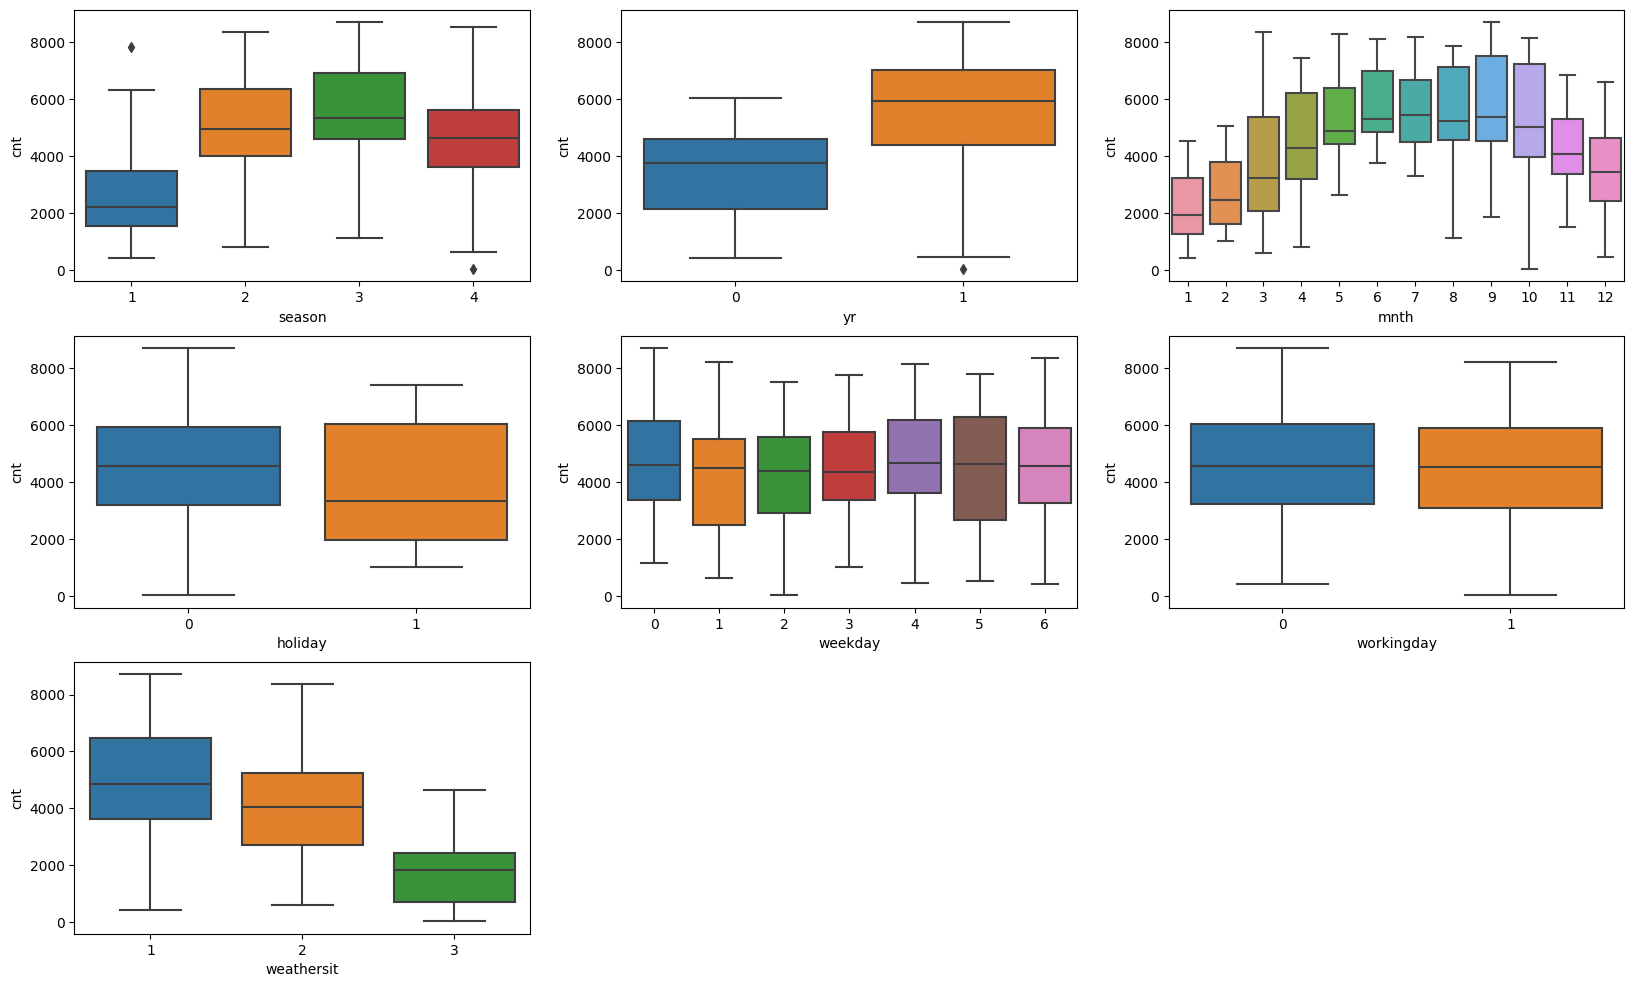

In [14]:
# Plotting Categorical columns
plt.figure(figsize=(20, 12))
catcol(cat_col)

**Observations**
- As per data dictionary, weather sit have  4 categorical values, but as per box plot between weatehrsit and cnt, there is not record present for category 4(Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)
- There is very slight increase in number of bikes when it is not a working day with comparison to working day
- The column weekday have almost similar median for all days, but have higher values for weekday 6 and 0, i.e. Saturday and Sunday respectively.
- The column holiday shows, high median value and overall more value when it is not a holiday.
- The column month shows, there is increase in value of median when months are increasing from 1 to 9 and after that median starts decreasing gradually
- The column yr shows, there are more values in 2019 than in 2018
- The column season shows, minimum medain value for season 1 i.e spring, then 2 i.e. summer, then 3 i.e. fall have maximum median and it decreases again for 4 i.e. winter

### Step 3: Data Preparation

In [15]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Replacing categorical columns with their values**

In [16]:
bike['season']=bike['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
bike['mnth']=bike['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
                                 8:'August',9:'September',10:'October',11:'November',12:'December'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [18]:
bike['weekday']=bike['weekday'].map({1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',
                                     0:'Sunday'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,1,9.305237,11.46350,43.6957,12.522300,1600


weathersit column categories
- 1(**Clear**): Clear, Few clouds, Partly cloudy, Partly cloudy
- 2(**Cloudy**): Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3(**Light Snow/Rain**): Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4(**Heavy Snow/Rain**): Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [19]:
bike['weathersit']=bike['weathersit'].map({1:'Clear',
                                           2:'Cloudy',
                                           3:'Light Snow/Rain',
                                           4:'Heavy Snow/Rain'})
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


**Creating dummy Variables for categorical columns**

In [20]:
cat_col=['season','mnth','weekday','weathersit']
dummy=pd.get_dummies(bike[cat_col],drop_first=True,dtype=int)
dummy.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Snow/Rain
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Merging dummy dataframe to bike dataframe and dropping categorical columns**

In [21]:
bike_merged=pd.concat([dummy,bike],axis=1)
bike_merged.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,January,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,January,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
bike_merged.drop(cat_col,axis=1,inplace=True)
bike_merged.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [23]:
bike_merged.shape

(730, 30)

### Step 4: Splitting Merged Dataframe into test and training datasets 

In [24]:
# Importing libraries for linear regression 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [25]:
train_df, test_df = train_test_split(bike_merged, train_size=0.8, random_state=42)

In [26]:
train_df.shape

(584, 30)

In [27]:
test_df.shape

(146, 30)

### Scaling

In [28]:
scaler_obj = MinMaxScaler()

In [29]:
#Scaling train_df dataset
train_df[num_col]=scaler_obj.fit_transform(train_df[num_col])

In [30]:
train_df.describe()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.229452,0.250000,0.255137,0.077055,0.075342,0.073630,0.090753,0.092466,0.085616,0.065068,...,0.344178,0.032534,0.511986,0.032534,0.691781,0.551484,0.527193,0.654151,0.410017,0.520520
std,0.420841,0.433384,0.436312,0.266907,0.264169,0.261392,0.287504,0.289931,0.280037,0.246858,...,0.475507,0.177566,0.500285,0.177566,0.462153,0.227249,0.212483,0.146644,0.187249,0.224926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.354266,0.353829,0.542745,0.276424,0.371088
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.566998,0.558730,0.657578,0.379465,0.523527
75%,0.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.745598,0.698392,0.757346,0.520978,0.691872
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
train_df.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
247,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0.765327,0.717455,0.814513,0.475900,0.382996
335,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0.317788,0.331261,0.644911,0.195963,0.450759
702,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0.519232,0.511907,0.756118,0.379454,0.757478
440,1,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0.566998,0.559152,0.778874,0.220845,0.898988
136,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0.626185,0.603102,0.863461,0.637592,0.471813


### Correlation

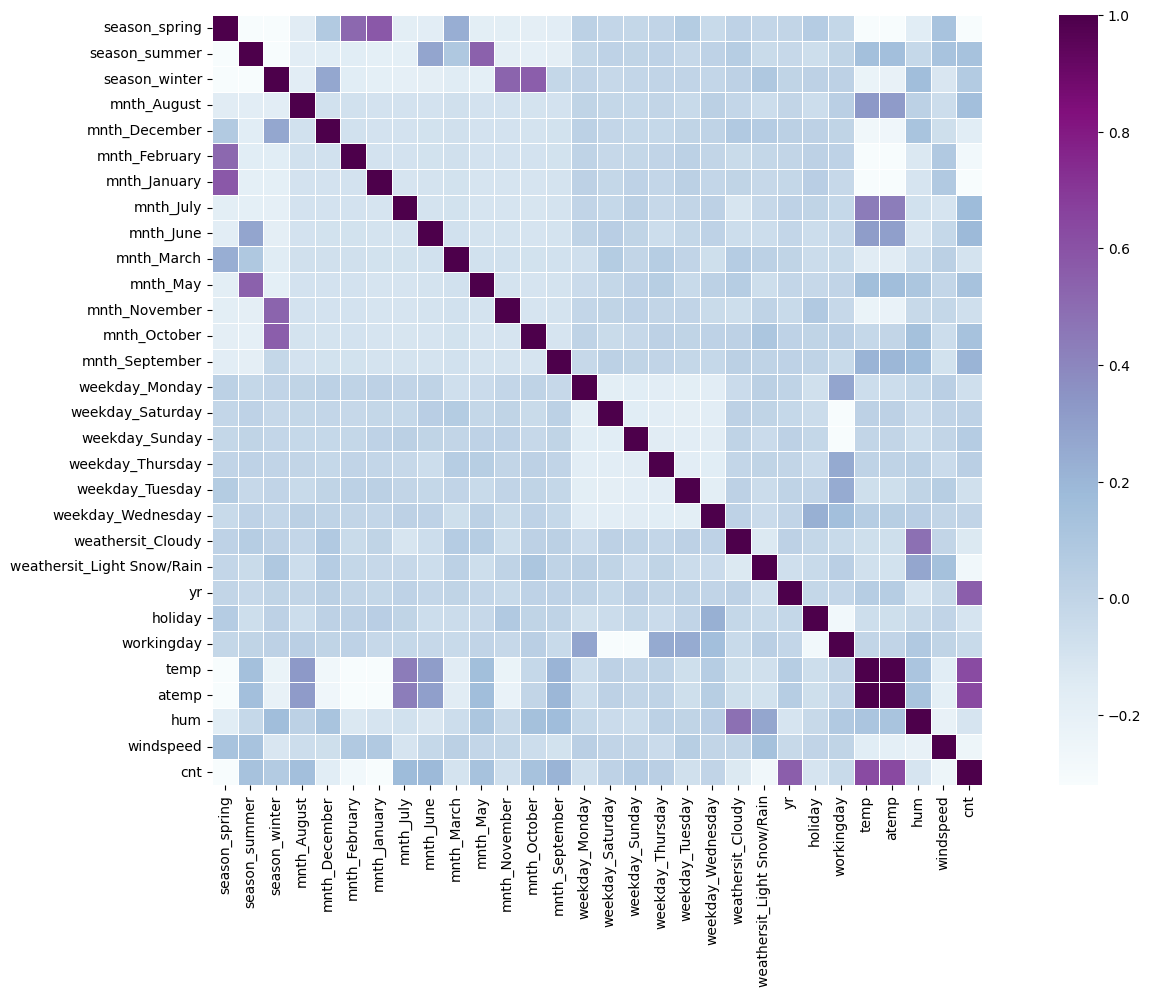

In [32]:
# Checking correlation of training datset
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(), robust=True, square=True,  linewidths=.5, cmap='BuPu')
plt.show()

### Dividing into X and y

In [33]:
# Assigning target variable (cnt) to y_training and remaining X_training
y_training=train_df.pop('cnt')
# y_training=y_training.values.reshape(-1,1)
X_training=train_df

### Building Linear Regression Model

In [34]:
#Using Recursive Feature Elimination to find the top 15 suitable independent/predicator vairavles
lr=LinearRegression()
lr.fit(X_training,y_training)
rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_training,y_training)

In [35]:
list(zip(X_training.columns,rfe.support_,rfe.ranking_))

[('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('mnth_August', False, 13),
 ('mnth_December', True, 1),
 ('mnth_February', False, 12),
 ('mnth_January', False, 11),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_March', True, 1),
 ('mnth_May', False, 2),
 ('mnth_November', True, 1),
 ('mnth_October', False, 5),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 3),
 ('weekday_Saturday', False, 8),
 ('weekday_Sunday', False, 9),
 ('weekday_Thursday', False, 15),
 ('weekday_Tuesday', False, 4),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Snow/Rain', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [36]:
#columns (best suitable as per RFE) to be added in model)
rfe_Col = X_training.columns[rfe.support_]

In [37]:
#Starting model building with the columns selected by RFE
X_training[rfe_Col].head()

,season_spring,season_winter,mnth_December,mnth_July,mnth_March,mnth_November,mnth_September,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,temp,atemp,hum,windspeed
247,0,0,0,0,0,0,1,1,0,0,1,0.765327,0.717455,0.814513,0.475900
335,0,1,1,0,0,0,0,0,0,0,0,0.317788,0.331261,0.644911,0.195963
702,0,1,1,0,0,0,0,0,0,1,0,0.519232,0.511907,0.756118,0.379454
440,1,0,0,0,1,0,0,1,0,1,0,0.566998,0.559152,0.778874,0.220845
136,0,0,0,0,0,0,0,1,0,0,0,0.626185,0.603102,0.863461,0.637592


In [38]:
# Adding constant to X_training_rfe for intercept, otherwise best fit line/plane will pass from origin
X_training = sm.add_constant(X_training)
rfe_Col=rfe_Col.insert(0,'const')
rfe_Col=list(rfe_Col)

In [39]:
X_training[rfe_Col].head()

,const,season_spring,season_winter,mnth_December,mnth_July,mnth_March,mnth_November,mnth_September,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,temp,atemp,hum,windspeed
247,1.0,0,0,0,0,0,0,1,1,0,0,1,0.765327,0.717455,0.814513,0.475900
335,1.0,0,1,1,0,0,0,0,0,0,0,0,0.317788,0.331261,0.644911,0.195963
702,1.0,0,1,1,0,0,0,0,0,0,1,0,0.519232,0.511907,0.756118,0.379454
440,1.0,1,0,0,0,1,0,0,1,0,1,0,0.566998,0.559152,0.778874,0.220845
136,1.0,0,0,0,0,0,0,0,1,0,0,0,0.626185,0.603102,0.863461,0.637592


In [40]:
#Defining LR fitting function
def fit_lr(X_training_fit):
    X = X_training_fit
    linearmodel = sm.OLS(y_training,X).fit()
    return (linearmodel)

In [41]:
#Defining VIF Function
def vif_lr(X_training_vif):
    vif_df = pd.DataFrame()
    X = X_training_vif
    vif_df['Predictors'] = X.columns
    vif_df['VIF_value'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df['VIF_value'] = round(vif_df['VIF_value'], 2)
    vif_df = vif_df.sort_values(by = "VIF_value", ascending = False)
    return vif_df

In [42]:
#Defining function to build model
def build_lr(X_training):
    X=X_training
    LR=fit_lr(X)
    print(LR.summary())
    print(vif_lr(X))
    return LR

In [43]:
# np.asarray(y_training).dtype

### First Model

In [44]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     191.4
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.19e-210
Time:                        15:44:46   Log-Likelihood:                 569.04
No. Observations:                 584   AIC:                            -1106.
Df Residuals:                     568   BIC:                            -1036.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- From this model, we can see temp have highest p value and also have highest VIF value.
- Hence dropping temp predictor variable. 

### Second Model

In [45]:
rfe_Col.remove('temp')

In [46]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     205.3
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.02e-211
Time:                        15:44:46   Log-Likelihood:                 568.81
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     569   BIC:                            -1042.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- From this model, atemp have high VIF value in comparison to other variable. 
- Hence dropping atemp

### Third Model

In [47]:
rfe_Col.remove('atemp')

In [48]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     157.0
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.24e-178
Time:                        15:44:46   Log-Likelihood:                 487.60
No. Observations:                 584   AIC:                            -947.2
Df Residuals:                     570   BIC:                            -886.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- In this model, R squared and adjusted R sqaured value drop significantly, hence adding atemp again.
- Also dropping mnth_March as it was having highest p value (as per second model)

### Fourth Model

In [49]:
rfe_Col.remove('mnth_March')
rfe_Col.append('atemp')

In [50]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     217.8
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          3.53e-211
Time:                        15:44:46   Log-Likelihood:                 564.73
No. Observations:                 584   AIC:                            -1101.
Df Residuals:                     570   BIC:                            -1040.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- Dropping season_spring as it having hishest VIF after atemp  

### Fifth Model

In [51]:
rfe_Col.remove('season_spring')

In [52]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     200.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          9.13e-196
Time:                        15:44:46   Log-Likelihood:                 525.47
No. Observations:                 584   AIC:                            -1025.
Df Residuals:                     571   BIC:                            -968.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- In this model, significant decrease in percenatge of R sqaured and adjusted r squared, hence adding season_spring again.
- As per third model, holiday was having hgihest p value, hence dropping it

### Sixth Model

In [53]:
rfe_Col.remove('holiday')
rfe_Col.append('season_spring')

In [54]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     231.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          2.78e-210
Time:                        15:44:46   Log-Likelihood:                 559.79
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     571   BIC:                            -1037.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- In this model, dropping mnth_September as season, hum and temp variables are already present, it might also help in decreasing multicollinearity.
- Also its coefficient value is small, and having highest p value

### Seventh Model

In [55]:
rfe_Col.remove('mnth_September')

In [56]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     246.9
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          5.95e-209
Time:                        15:44:46   Log-Likelihood:                 553.79
No. Observations:                 584   AIC:                            -1084.
Df Residuals:                     572   BIC:                            -1031.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- In this model, no p-value is greater than 0.000
- season_winter is having highest VIF after atemp and season_spring.
- Hence trying dropping it

### Eight Model

In [57]:
rfe_Col.remove('season_winter')

In [58]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     252.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          1.25e-202
Time:                        15:44:46   Log-Likelihood:                 536.02
No. Observations:                 584   AIC:                            -1050.
Df Residuals:                     573   BIC:                            -1002.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- In this model, there is 1 % drop in R sqaured value, which is significant, hence adding season_winter column again.
- As per the this and previous model, weathersit_Cloudy have least absolute coefficint value.
- Hence trying dropping it

### Ninth Model

In [59]:
rfe_Col.append('season_winter')
rfe_Col.remove('weathersit_Cloudy')

In [60]:
LR=build_lr(X_training[rfe_Col])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     260.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          8.11e-206
Time:                        15:44:46   Log-Likelihood:                 543.52
No. Observations:                 584   AIC:                            -1065.
Df Residuals:                     573   BIC:                            -1017.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

- This model seems compartively good, having 10 variables, R sqaured and adjusted R sqaured at 82% approx.

### Final Model

In [61]:
FM = LR
print(FM.params)

const                         0.411459
mnth_December                -0.066831
mnth_July                    -0.072359
mnth_November                -0.081336
weathersit_Light Snow/Rain   -0.181362
yr                            0.224226
hum                          -0.255645
windspeed                    -0.149294
atemp                         0.489514
season_spring                -0.138676
season_winter                 0.083577
dtype: float64


## Evaluating Final Model
### Residual Analysis for the training data

In [62]:
#Predicting target variable as per the model
y_training_pred = FM.predict(X_training[rfe_Col])

In [63]:
y_training_pred.shape

(584,)

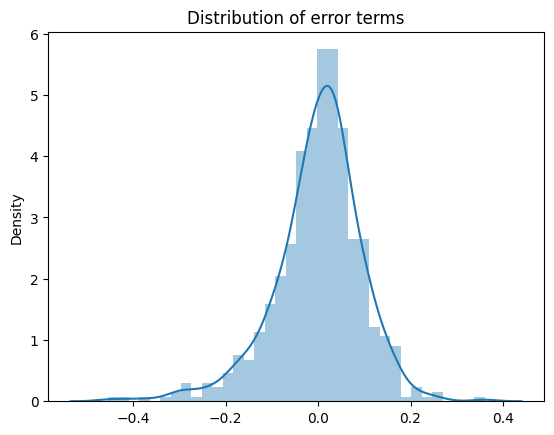

In [64]:
#Calculating Error between predicted value and actual value
res_error = y_training - y_training_pred
sns.distplot(res_error)
plt.title("Distribution of error terms")
plt.show()

- From above plot, we can say, error terms seems to be normally distributed aroung the 0.

### Checking for pattern in error terms

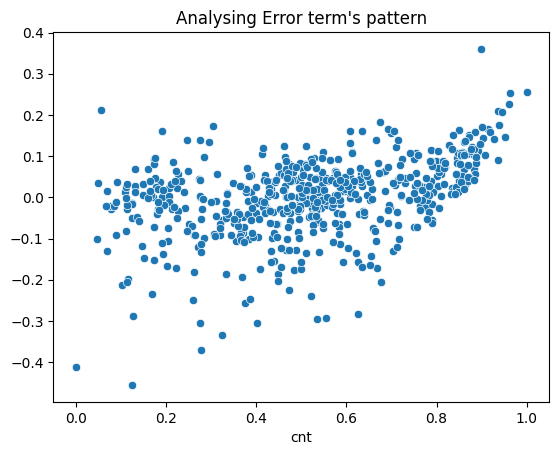

In [65]:
sns.scatterplot(x=y_training,y=res_error)
plt.title("Analysing Error term's pattern")
plt.show()

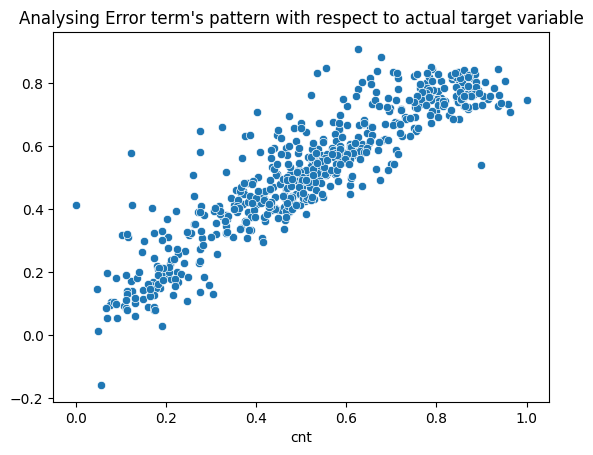

In [66]:
sns.scatterplot(x=y_training,y=y_training_pred)
plt.title("Analysing Error term's pattern with respect to actual target variable")
plt.show()

- From the above plots, it seems there is no such pattern in error terms with respect to target variable

**Checking R squared and Mean sqaured error value**

In [67]:
r2_train=r2_score(y_training,y_training_pred)
r2_train

0.8197767542750275

In [68]:
mse_train=mean_squared_error(y_training, y_training_pred)
mse_train

0.009102165782329771

## Predicting values for Test data set

In [69]:
test_df.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
468,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,20.295000,24.39980,50.2917,12.791439,7460
148,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,27.367500,30.77750,81.8750,14.333846,4788
302,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,13.085847,16.06645,62.3750,11.833339,3331
355,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,17.356653,21.30605,75.7500,3.167425,3068
515,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,27.880000,31.56645,49.2917,13.083693,7338


In [70]:
#Scaling test data set
test_df[num_col]=scaler_obj.transform(test_df[num_col])

In [71]:
test_df.describe()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.315068,0.260274,0.198630,0.116438,0.123288,0.089041,0.061644,0.054795,0.068493,0.164384,...,0.308219,0.013699,0.452055,0.013699,0.684932,0.513327,0.486680,0.617324,0.461923,0.498457
std,0.466142,0.440294,0.400342,0.321854,0.329899,0.285783,0.241335,0.228362,0.253460,0.371899,...,0.463347,0.116637,0.499409,0.116637,0.466142,0.229925,0.217533,0.143761,0.214336,0.213583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.062226,0.142775
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.317742,0.306197,0.516316,0.294317,0.310084
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.483409,0.471301,0.601975,0.445562,0.503164
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.723272,0.677047,0.714815,0.547829,0.665526
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.960541,0.939531,1.002146,1.213032,0.981707


In [72]:
test_df.head()

,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,...,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
468,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0.543115,0.536771,0.518248,0.421436,0.855729
148,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.758058,0.704203,0.843709,0.479005,0.548320
302,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.324018,0.317998,0.642765,0.385676,0.380695
355,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0.453814,0.455552,0.780592,0.062226,0.350437
515,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0.773634,0.724915,0.507943,0.432344,0.841694


In [73]:
#Dividing into x and y
y_test=test_df.pop('cnt')
X_test=test_df

In [74]:
y_test.head()

468    0.855729
148    0.548320
302    0.380695
355    0.350437
515    0.841694
Name: cnt, dtype: float64

In [75]:
X_test = sm.add_constant(X_test)
X_test.head()

,const,season_spring,season_summer,season_winter,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,...,weekday_Wednesday,weathersit_Cloudy,weathersit_Light Snow/Rain,yr,holiday,workingday,temp,atemp,hum,windspeed
468,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0.543115,0.536771,0.518248,0.421436
148,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.758058,0.704203,0.843709,0.479005
302,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0.324018,0.317998,0.642765,0.385676
355,1.0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0.453814,0.455552,0.780592,0.062226
515,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.773634,0.724915,0.507943,0.432344


In [76]:
#Predicting y values for test data
y_test_pred = FM.predict(X_test[rfe_Col])

In [77]:
#Checking r squared value for test data
r2_test=r2_score(y_test,y_test_pred)
r2_test

0.8355658459063394

In [78]:
#checking mean squared error for test data
mse_test=mean_squared_error(y_test, y_test_pred)
mse_test

0.007449711278227772

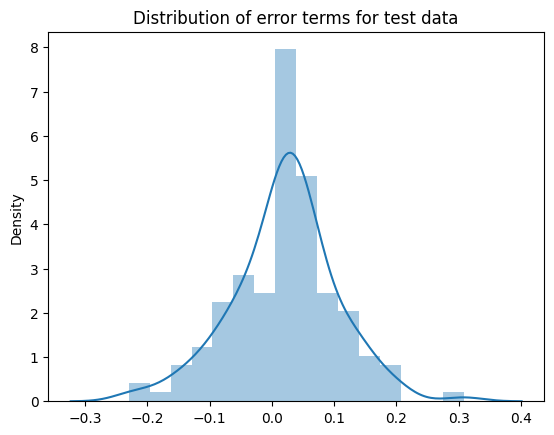

In [79]:
#Calculating Error between predicted value and actual value
res_error_test = y_test - y_test_pred
sns.distplot(res_error_test)
plt.title("Distribution of error terms for test data")
plt.show()

- From the above plot, error terms seeems to be normally distributed across 0

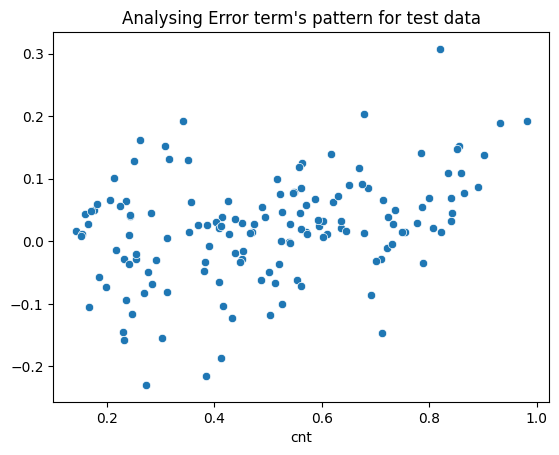

In [80]:
sns.scatterplot(x=y_test,y=res_error_test)
plt.title("Analysing Error term's pattern for test data")
plt.show()

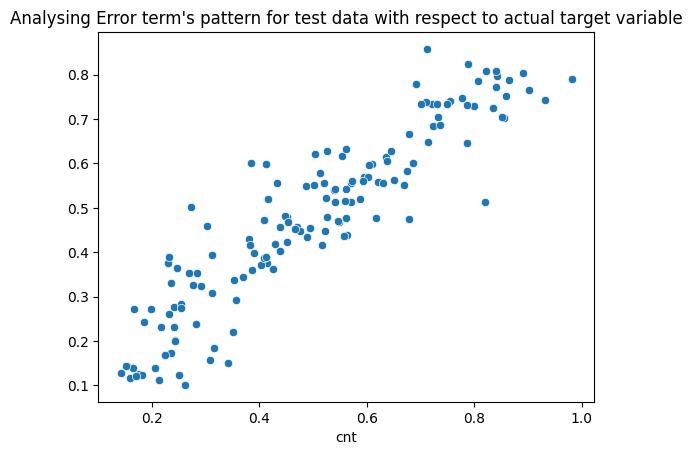

In [81]:
sns.scatterplot(x=y_test,y=y_test_pred)
plt.title("Analysing Error term's pattern for test data with respect to actual target variable")
plt.show()

- From above plots, no such pattern is visible in error terms of test data

## Interpreting Final Model

In [82]:
FM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     260.6
Date:                Mon, 10 Jul 2023   Prob (F-statistic):          8.11e-206
Time:                        15:44:47   Log-Likelihood:                 543.52
No. Observations:                 584   AIC:                            -1065.
Df Residuals:                     573   BIC:                            -1017.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.4115      0.033     12.655      0.000       0.348       0.475
mnth_December                 -0.0668      0.017     -3.900      0.000      -0.100      -0.033
mnth_July                     -0.0724      0.016     -4.594      0.000      -0.103      -0.041
mnth_November                 -0.0813      0.018     -4.521      0.000      -0.117      -0.046
weathersit_Light Snow/Rain    -0.1814      0.024     -7.528      0.000      -0.229      -0.134
yr                             0.2242      0.008     27.753      0.000       0.208       0.240
hum                           -0.2556      0.031     -8.370      0.000      -0.316      -0.196
windspeed                     -0.1493      0.023     -6.513      0.000      -0.194      -0.104
atemp                          0.4895      0.034     14.284      0.000       0.422       0.557
season_spring                 -0.1387      0.016     -8.765      0.000      -0.170      -0.108
season_winter                  0.0836      0.013      6.193      0.000       0.057       0.110
==============================================================================
Omnibus:                       87.806   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.010
Skew:                          -0.798   Prob(JB):                     1.84e-45
Kurtosis:                       5.432   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
print(f'R sqaured value = {r2_train} and Mean sqaure error value = {mse_train} of training data')
print(f'R sqaured value = {r2_test} and Mean sqaure error value = {mse_test} of testing data')

R sqaured value = 0.8197767542750275 and Mean sqaure error value = 0.009102165782329771 of training data
R sqaured value = 0.8355658459063394 and Mean sqaure error value = 0.007449711278227772 of testing data


In [84]:
final_parameter = FM.params.sort_values(ascending=False)
final_parameter

atemp                         0.489514
const                         0.411459
yr                            0.224226
season_winter                 0.083577
mnth_December                -0.066831
mnth_July                    -0.072359
mnth_November                -0.081336
season_spring                -0.138676
windspeed                    -0.149294
weathersit_Light Snow/Rain   -0.181362
hum                          -0.255645
dtype: float64

## Equation
**cnt = 0.411 * const + 0.49 * atemp + 0.224 * yr + 0.084 * season_winter - 0.067 * mnth_December - 0.072 * mnth_July - 0.081 * mnth_November - 0.139 * season_spring - 0.149 * windspeed - 0.181 * weathersit_Light Snow/Rain - 0.256 * hum**

## Significant Variables to predict cnt
- **atemp**
- **yr**
- **season_winter**
- **mnth_December**
- **mnth_July**
- **mnth_November**
- **season_spring**
- **windspeed**
- **weathersit_Light Snow/Rain**
- **hum**

## Conclusion
From the above equation, we can state:
- Company should focus when temperature/feeling tempeature is high or it is winter season (Positive coefficients).


- Also, company should improve for months July, Novemeber and December and also for spring season and when humidity is high(Negative Coefficients).


- Also yr coefficient is positive, which indicates, services was improving in 2019, i.e. before covid. Hence company should have a positive attitude and cnt will improve once situation becomes normal i.e. after covid